# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
cities

['vaini',
 'cedar city',
 'carnarvon',
 'umm lajj',
 'ushuaia',
 'hermanus',
 'chokurdakh',
 'constitucion',
 'makakilo city',
 'barkhan',
 'bredasdorp',
 'port alfred',
 'coihaique',
 'sibu',
 'yellowknife',
 'rikitea',
 'beringovskiy',
 'port augusta',
 'dibaya',
 'simplicio mendes',
 'barrow',
 'talakan',
 'verkhnevilyuysk',
 'pevek',
 'avarua',
 'cidreira',
 'shelburne',
 'la romana',
 'bonavista',
 'busselton',
 'ponta do sol',
 'sao filipe',
 'lyubim',
 'kazalinsk',
 'okha',
 'butaritari',
 'punta arenas',
 'waipawa',
 'makung',
 'mataura',
 'deputatskiy',
 'henties bay',
 'sur',
 'jamestown',
 'bolungarvik',
 'moanda',
 'hualmay',
 'nizhneyansk',
 'dicabisagan',
 'belushya guba',
 'kapaa',
 'mabaruma',
 'vardo',
 'necochea',
 'mokrousovo',
 'laguna',
 'acapulco',
 'stoyba',
 'lolua',
 'berezovyy',
 'kristianstad',
 'arraial do cabo',
 'novikovo',
 'nalut',
 'petropavlovsk-kamchatskiy',
 'barentsburg',
 'ancud',
 'thompson',
 'mian channun',
 'noumea',
 'lompoc',
 'tasiilaq',
 'l

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Build query URL and request your results for Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# set up lists to hold reponse info
city_name = []
lat = []
long = []
max_temperature = []
humidity = []
clouds = []
wind = []
country = []
time = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Print the header
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through cities in cities list
loop_count = 0

for city in cities:
#print(city)
    try:
        # Get weather data - To be sorted ######
        response = requests.get(query_url + city).json()
        #weather_json = weather_response.json()
    
        # Get temperature from JSON response
        loop_count = loop_count + 1
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        time.append(response["dt"])
        print(f"Processing Record {loop_count} of Set 1 | {city}")
    
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | cedar city
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | umm lajj
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | barkhan
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | sibu
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | port augusta
City not found. Skipping...
Processing Record 20 of Set 1 | simplicio mendes
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | talakan
Processing Record 23 of Set 1 | verkhne

Processing Record 204 of Set 1 | ketchikan
Processing Record 205 of Set 1 | bambanglipuro
Processing Record 206 of Set 1 | aneho
Processing Record 207 of Set 1 | ixtapa
Processing Record 208 of Set 1 | severo-kurilsk
Processing Record 209 of Set 1 | noyon
Processing Record 210 of Set 1 | karratha
City not found. Skipping...
Processing Record 212 of Set 1 | husavik
Processing Record 213 of Set 1 | bud
Processing Record 214 of Set 1 | dikson
Processing Record 215 of Set 1 | khovu-aksy
Processing Record 216 of Set 1 | port elizabeth
Processing Record 217 of Set 1 | luanda
Processing Record 218 of Set 1 | eureka
Processing Record 219 of Set 1 | bethel
Processing Record 220 of Set 1 | torbay
Processing Record 221 of Set 1 | padang
Processing Record 222 of Set 1 | cayenne
Processing Record 223 of Set 1 | san cristobal
Processing Record 224 of Set 1 | luderitz
Processing Record 225 of Set 1 | westport
Processing Record 226 of Set 1 | nelidovo
Processing Record 227 of Set 1 | diu
Processing Re

Processing Record 404 of Set 1 | nautla
Processing Record 405 of Set 1 | huarmey
Processing Record 406 of Set 1 | wawa
Processing Record 407 of Set 1 | abu kamal
Processing Record 408 of Set 1 | souillac
Processing Record 409 of Set 1 | tocache
Processing Record 410 of Set 1 | vancouver
Processing Record 411 of Set 1 | lakes entrance
Processing Record 412 of Set 1 | xining
Processing Record 413 of Set 1 | vao
Processing Record 414 of Set 1 | comodoro rivadavia
Processing Record 415 of Set 1 | tuscaloosa
Processing Record 416 of Set 1 | bara
Processing Record 417 of Set 1 | broome
Processing Record 418 of Set 1 | aquiraz
Processing Record 419 of Set 1 | abohar
Processing Record 420 of Set 1 | khorixas
Processing Record 421 of Set 1 | pasni
Processing Record 422 of Set 1 | kuytun
Processing Record 423 of Set 1 | vila velha
City not found. Skipping...
Processing Record 425 of Set 1 | hamilton
Processing Record 426 of Set 1 | saint-pierre
Processing Record 427 of Set 1 | tabuk
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country":country,
    "Time":time
}
weather_data_df = pd.DataFrame(weather_dict)

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

weather_data_df.head(20)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Time
0,Vaini,-21.2000,-175.2000,24.09,94,20,3.09,TO,1659977545
1,Cedar City,37.6775,-113.0619,27.44,35,0,2.06,US,1659977545
2,Carnarvon,-24.8667,113.6333,16.04,94,100,4.63,AU,1659977545
3,Umluj,25.0213,37.2685,32.16,61,20,4.81,SA,1659977546
4,Ushuaia,-54.8000,-68.3000,4.81,52,20,1.54,AR,1659977546
5,Hermanus,-34.4187,19.2345,14.89,86,51,1.43,ZA,1659977546
6,Chokurdakh,70.6333,147.9167,13.77,45,99,2.88,RU,1659977546
7,Constitución,-35.3333,-72.4167,12.93,64,0,3.57,CL,1659977547
8,Makakilo City,21.3469,-158.0858,25.11,71,0,4.12,US,1659977547
9,Barkhan,29.8977,69.5256,29.22,61,96,2.02,PK,1659977547


In [6]:
weather_data_df.dtypes

City           object
Lat           float64
Long          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Time            int64
dtype: object

In [7]:
weather_data_df.shape

(561, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#high_humidity = []
max_hum = 100.1

#  Get the indices of cities that have humidity over 100%.
high_hum = weather_data_df[(weather_data_df["Humidity"] > max_hum)].index
   

high_hum

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

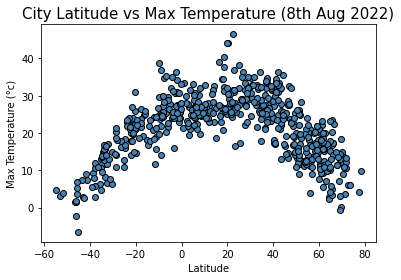

In [9]:
# Generate a scatter plot showing latitude vs. temperature.

max_temp_plt = weather_data_df["Max Temp"]
lat_plt = weather_data_df["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature (8th Aug 2022)"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")
plt.scatter(lat_plt, max_temp_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Max Temperature.png")

#### The data shows that the temperture drops as you head away from the equator.

## Latitude vs. Humidity Plot

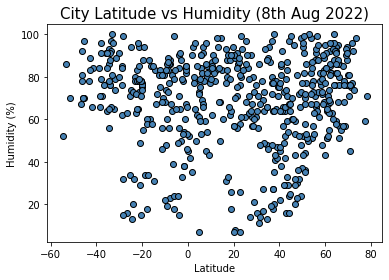

In [10]:
# Generate a scatter plot showing latitude vs. humidity.

humidity_plt = weather_data_df["Humidity"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity (8th Aug 2022)"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(lat_plt, humidity_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Humidity.png")

#### The data shows that latitude does not have as effect on Humidity  

## Latitude vs. Cloudiness Plot

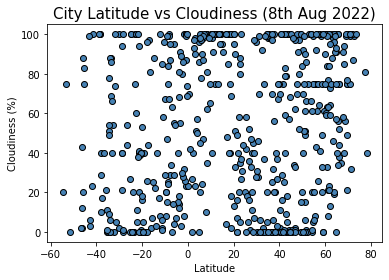

In [11]:
# Generate a scatter plot showing latitude vs. temperature.

cloudiness_plt = weather_data_df["Cloudiness"]
#lat_plt = weather_data_pd["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness (8th Aug 2022)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(lat_plt, cloudiness_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Cloudiness.png")

#### The data shows that an increasing latitude away from the equator does not have a bearing on cloudiness.  

## Latitude vs. Wind Speed Plot

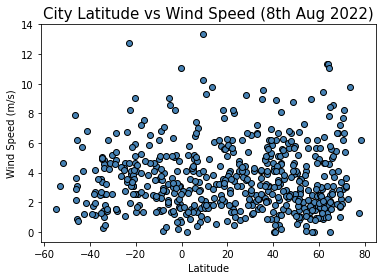

In [12]:
# Generate a scatter plot showing latitude vs. temperature.

wind_plt = weather_data_df["Wind Speed"]
#lat_plt = weather_data_pd["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed (8th Aug 2022)"),fontsize=15)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.scatter(lat_plt, wind_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Wind Speed.png")

#### The data shows that an increasing latitude away from the equator does not have a bearing on wind speed.  

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
# Calculate the correlation coefficient 
# for Max Temp vs. Latitude Linear Regression
north_df = weather_data_df[(weather_data_df["Lat"] > 0)]
lat_n_plt = north_df["Lat"]
max_temp_n_plt = north_df["Max Temp"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, max_temp_n_plt)[0],2)}")

The r-value is -0.67


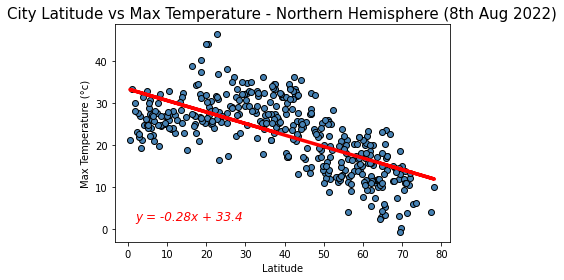

In [14]:
# Plot the line of regression latitude vs. temperature.
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, max_temp_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(2,2),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature - Northern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")
plt.scatter(lat_n_plt, max_temp_n_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Max Temperature Northern Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
south_df = weather_data_df[(weather_data_df["Lat"] < 0)]
lat_s_plt = south_df["Lat"]
max_temp_s_plt = south_df["Max Temp"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, max_temp_s_plt)[0],2)}")

The r-value is 0.86


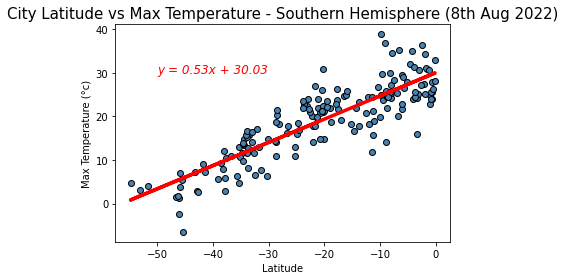

In [16]:
# Plot the line of regression latitude vs. temperature.
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, max_temp_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-50,30),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature - Southern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")
plt.scatter(lat_s_plt, max_temp_s_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Max Temperature Southern Hemisphere.png")

#### The lines of regression demonstrate that as you head away from the equator the temperature drops.  There is a strong correlation.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
humidity_n_plt = north_df["Humidity"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, humidity_n_plt)[0],2)}")

The r-value is 0.06


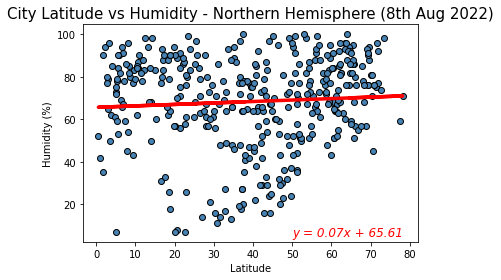

In [18]:
# Plot the line of regression latitude vs. Humidity (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, humidity_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(50,5),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity - Northern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(lat_n_plt, humidity_n_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Humidity Northern Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
humidity_s_plt = south_df["Humidity"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, humidity_s_plt)[0],2)}")

The r-value is -0.25


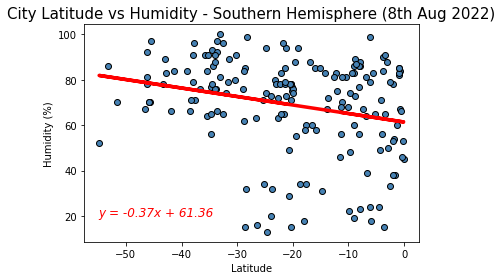

In [20]:
# Plot the line of regression latitude vs. Humidity (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, humidity_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,20),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity - Southern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(lat_s_plt, humidity_s_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Humidity Southern Hemisphere.png")

#### The lines of regression demonstrate that as you head away from the equator the humidity increases but there is a weak correlation.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [21]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
cloud_n_plt = north_df["Cloudiness"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, cloud_n_plt)[0],2)}")

The r-value is -0.0


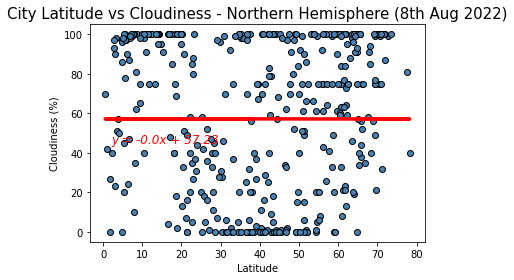

In [22]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, cloud_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(2,45),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness - Northern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(lat_n_plt, cloud_n_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Cloudiness Northern Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
cloud_s_plt = south_df["Cloudiness"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, cloud_s_plt)[0],2)}")

The r-value is 0.11


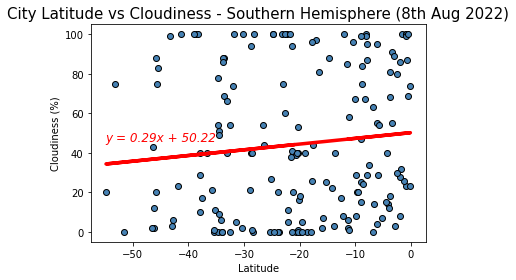

In [24]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, cloud_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,46),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness - Southern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(lat_s_plt, cloud_s_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Cloudiness Southern Hemisphere.png")

#### The lines of regression demonstrate a weak correlation in the data, and latitude does not effect Cloundiness

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
wind_n_plt = north_df["Wind Speed"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, wind_n_plt)[0],2)}")

The r-value is -0.01


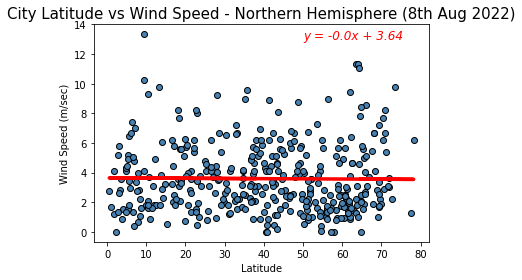

In [26]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, wind_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(50,13),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed - Northern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")
plt.scatter(lat_n_plt, wind_n_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Wind Speed Northern Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
wind_s_plt = south_df["Wind Speed"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, wind_s_plt)[0],2)}")

The r-value is 0.03


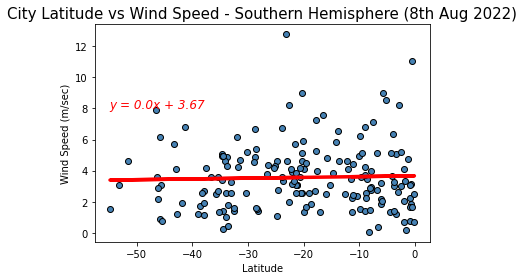

In [28]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, wind_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,8),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed - Southern Hemisphere (8th Aug 2022)"),fontsize=15)
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")
plt.scatter(lat_s_plt, wind_s_plt, marker="o", facecolors="steelblue", edgecolors="black")
plt.savefig("Plots/City Latitude vs Wind Speed Southern Hemisphere.png")

#### The lines of regression demonstrate a weak correlation in the data, and latitude does not effect Wind Speed